In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Loading dataset
df = pd.read_csv('/content/Housing.csv')

In [ ]:
# Displaying first few rows
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Checking data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
# Checking for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


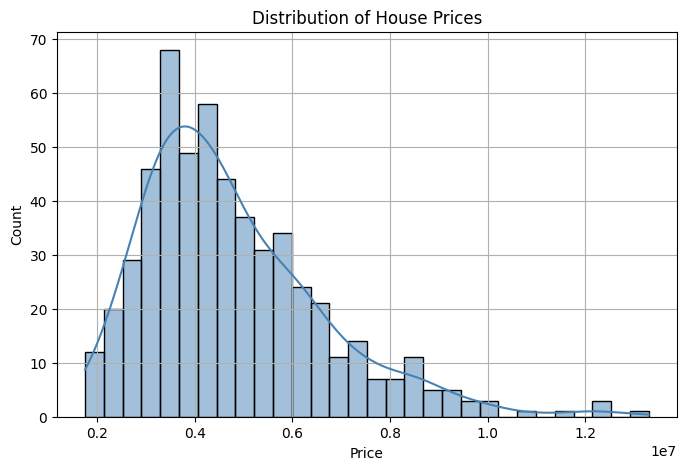

In [ ]:
# Visualizing the Data
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
# Converting categorical variables to numeric (e.g., Location, Furnishingstatus)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Viewing updated columns
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [ ]:
# Defining independent variables (features)
X = df.drop('price', axis=1)

In [ ]:
# Defining dependent variable (target)
y = df['price']

In [ ]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initializing and training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting prices
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 1754318687330.66
R² Score: 0.65


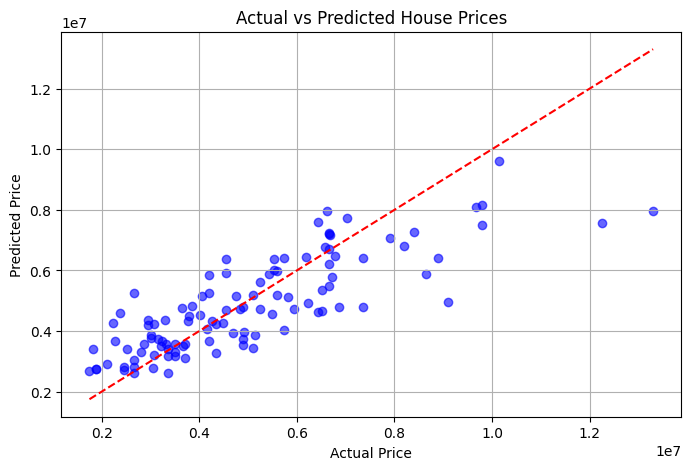

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [ ]:
# Getting feature column names after one-hot encoding
feature_names = X.columns.tolist()
sample_input = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)

In [ ]:
# Setting values for relevant features (example: 2300 sq ft, 3 beds, 2 baths, etc.)
sample_input.at[0, 'area'] = 2300
sample_input.at[0, 'bedrooms'] = 3
sample_input.at[0, 'bathrooms'] = 2
sample_input.at[0, 'stories'] = 2
sample_input.at[0, 'parking'] = 1
sample_input.at[0, 'mainroad_yes'] = 1
sample_input.at[0, 'guestroom_yes'] = 0
sample_input.at[0, 'basement_yes'] = 1
sample_input.at[0, 'hotwaterheating_yes'] = 0
sample_input.at[0, 'airconditioning_yes'] = 1
sample_input.at[0, 'prefarea_yes'] = 1
sample_input.at[0, 'furnishingstatus_semi-furnished'] = 1
sample_input.at[0, 'furnishingstatus_unfurnished'] = 0

In [ ]:
# Predicting the price
predicted_price = model.predict(sample_input)[0]

In [ ]:
# Printing the inputs and result dynamically
input_values = sample_input.iloc[0]
print(f"Predicted Price for {int(input_values['area'])} sq ft, "f"{int(input_values['bedrooms'])} beds, {int(input_values['bathrooms'])} baths: "f"₹ {int(predicted_price):,}")

Predicted Price for 2300 sq ft, 3 beds, 2 baths: ₹ 6,314,387
